### 타이타닉 생존자 예측

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:
titanic_df = pd.read_csv("titanic_train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
# 나이 결측치 처리
age_mean = titanic_df["Age"].mean()
print(age_mean)
titanic_df["Age"] = titanic_df["Age"].fillna(age_mean)


29.69911764705882


In [60]:
# Cabin 결측치 처리
titanic_df.groupby("Cabin").count()
titanic_df["Cabin"] = titanic_df["Cabin"].fillna("N")

In [61]:
titanic_df.groupby(["Sex", "Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

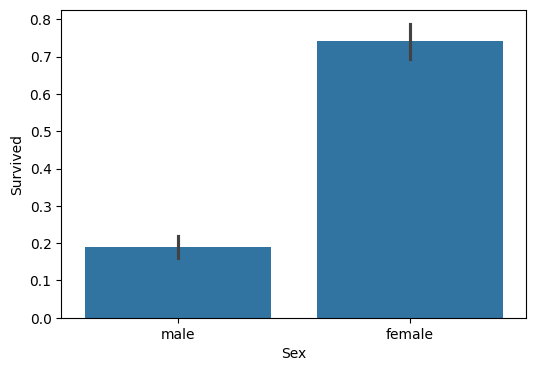

In [62]:
# 시각화
plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Survived", data=titanic_df)
plt.show()


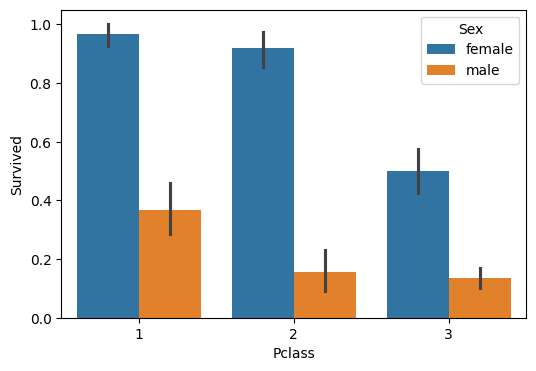

In [63]:
plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=titanic_df)
plt.show()

In [64]:
# 나이 카테고리 생성
def age_category(age):
    if age <= 5:
        return "baby"
    if age <= 12:
        return "child"
    if age <= 18:
        return "teenage"
    if age <= 25:
        return "student"
    if age <= 35:
        return "young_adult"
    if age <= 60:
        return "adult"
    return "elderly"

    
    

In [65]:
titanic_df["Age_class"] = titanic_df["Age"].apply(lambda x: age_category(x))
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,young_adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,young_adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,young_adult


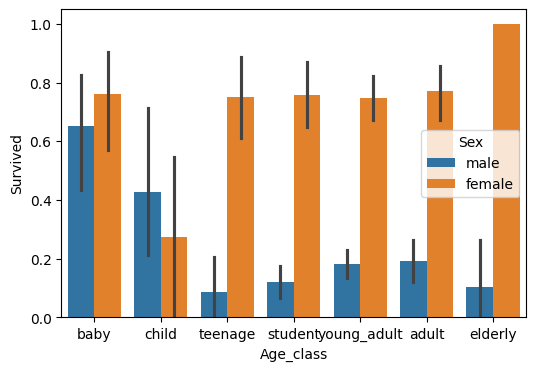

In [66]:
plt.figure(figsize=(6,4))
sns.barplot(
    x="Age_class",
    y="Survived",
    hue="Sex",
    data=titanic_df,
    order=["baby", "child", "teenage", "student", "young_adult", "adult", "elderly"]
)
plt.show()

In [67]:
# label encoder 사용해보기 - onehot encoding이 필요한 경우
from sklearn.preprocessing import LabelEncoder

def encode_features(data_frame):
    df_tmp = data_frame.copy()
    feature = ["Sex", "Embarked", "Age_class"]
    for f in feature:
        le = LabelEncoder()
        le.fit(df_tmp[f])
        tmp = le.transform(df_tmp[f])
        df_tmp[f] = tmp
    return df_tmp
        
titanic_df_new = encode_features(titanic_df)
titanic_df_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_class
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,N,2,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,N,2,6
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,6
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,N,2,6


In [68]:
# 불필요한 feature 제거
drop_features = ["PassengerId", "Name", "Ticket", "Cabin"]
titanic_df_new.drop(drop_features, axis=1, inplace=True)
titanic_df_new.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_class
0,0,3,1,22.0,1,0,7.2500,2,4
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,2,6
3,1,1,0,35.0,1,0,53.1000,2,6
4,0,3,1,35.0,0,0,8.0500,2,6


In [69]:
y = titanic_df_new["Survived"]
X = titanic_df_new.drop(["Survived"], axis=1)


In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)


In [71]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [78]:
dt_proba = dt_clf.predict_proba(X_test)
# print(dt_proba)
y_pred = dt_clf.predict(X_test)
print(y_pred)
print(y_test.values)

[1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1
 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0
 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0]
[1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0
 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1
 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0
 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1]


In [77]:
from sklearn.metrics import *

print("정확도:", accuracy_score(y_test, y_pred))
print("재현율:", recall_score(y_test, y_pred))
print("정밀도:", precision_score(y_test, y_pred))
print("f1점수:", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

정확도: 0.776536312849162
재현율: 0.6557377049180327
정밀도: 0.6779661016949152
f1점수: 0.6666666666666666
[[99 19]
 [21 40]]


In [90]:
y_test.values

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1])

In [91]:
roc_auc = roc_auc_score(y_test, dt_proba[:, 1])
print(roc_auc)

0.7473603778827452


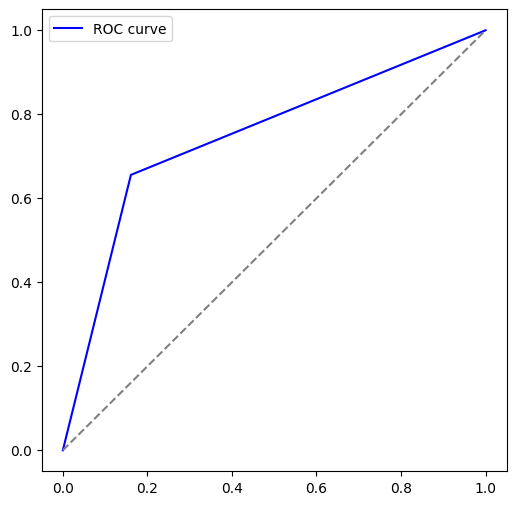

In [97]:
# ROC curve

fpr, tpr, roc_threshold = roc_curve(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color="blue", label="ROC curve")
plt.plot([0,1], [0,1], color="gray", linestyle="--")
plt.legend()
plt.show()



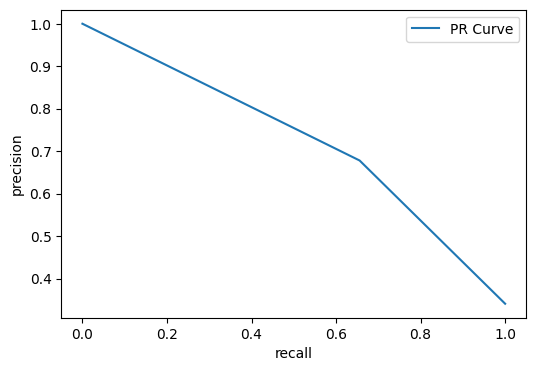

In [96]:
# precision, recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.plot(recalls, precisions, label="PR Curve")
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend()
plt.show()

In [101]:
# threshold 값 바꿔보기
for pre, re, th in zip(precisions, recalls, thresholds):
    print(f"Precision: {pre}, Recall: {re}, threshold: {th}")

Precision: 0.3407821229050279, Recall: 1.0, threshold: 0
Precision: 0.6779661016949152, Recall: 0.6557377049180327, threshold: 1
